# Data Bootcamp Final Project : Analyse of the Art Market trend in the beginning of the XXIst century 

### "If you don’t have the knowledge you’re lost. A lot of people talk but they don’t have the knowledge, and knowledge is power.” - Rosa de la Cruz (former attorney for the Guggenheim Museum). 


In this day and age, we might interpret Cruz's words as alluding to an understanding of current trends in the global art market. For instance: what makes a da Vinci worth over 450 million dollars 500 years after its conception, while a work by a contemporary artist has never peaked even 150 million? Why is it than within a span of four years, the price of an artwork can drop from 1,625,000 dollars to 665,336 dollars (Jim Beam - Observation Car - Jeff Koons)? 


By studying, plotting and mapping the avaiable data from Artprice, and also the archives of prominent auction houses we can start to answer such questions. 

## World auction record : _Salvatore Mundi_ -  Leonardo da Vinci, 1490 - Sold for $450.3 million in 2017


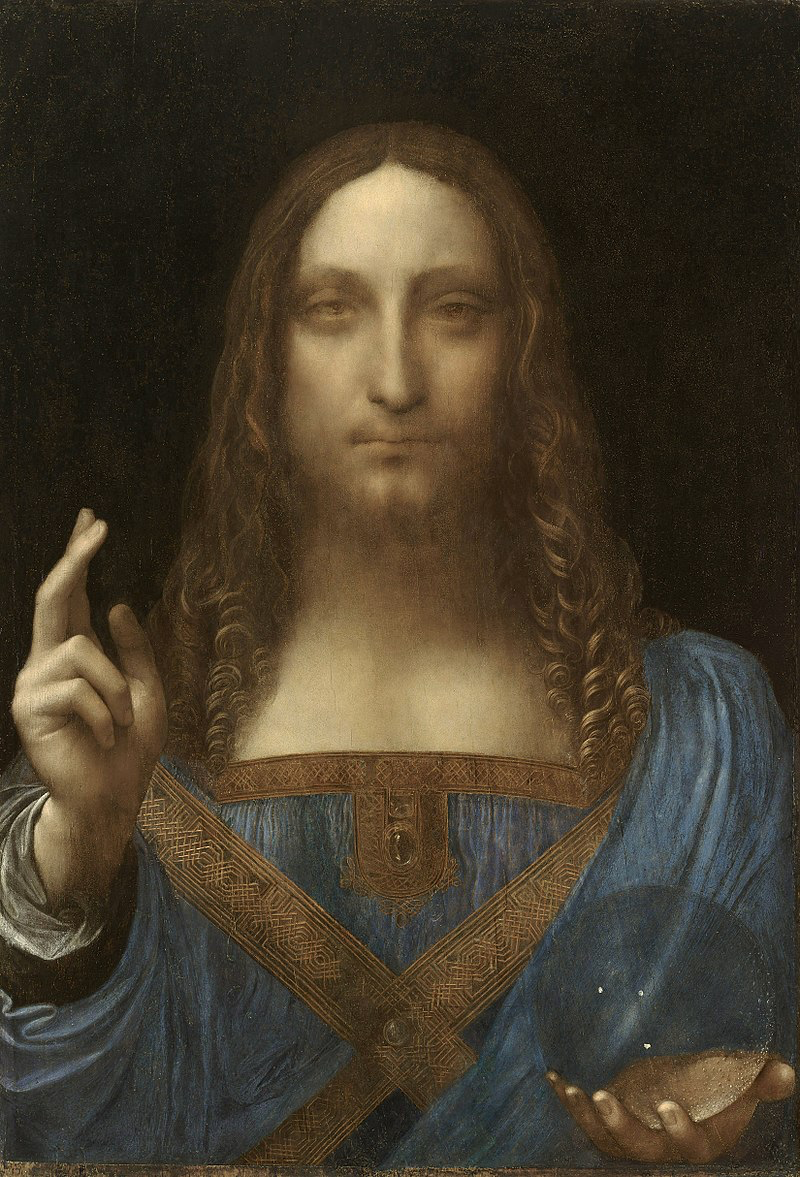

# Content

### 0. Introduction

	0.0 Justification of the project
	0.1 Objectives and Methods of the Project 
	0.2 Expected results
	0.3 Sources : ArtPrice
	0.4 Import the package

### 1. Grabbing the data

	1.1 Top auctions : 2002-2003 // 2008-2009 // 2016-2017
	1.2 Top Artists
	1.3 Artists from different periods : Contemporary vs. Old Masters
	1.4 Countries where the main auctions take place

### 2. Cleaning the data

	2.0 First look at the datasets and cleaning process
	2.1 Cleaning : string methods (slicing, replacing, converting), drop and rename
	2.2 Merging : the final data set
	2.3 A closer look to the final data sets

### 3. First results

	3.0 In which main countries do the top auctions occur ?
	3.1 Global evolution of the art market
	3.3 First conclusions : trends of the art market in the beginning of the XXI° century

### 4. Which artists is the most profitable ?

	4.0 Top artists sold
	4.1 Visualisation : what is the main structure of the paintings sold by the "best" artists ? (best in the sense of most sold)
	4.2 Should we invest in Old masters paintings ?
	4.3 Is there any correlation between the number of lots sold by from an artist and the total Turnover of this same artist?
	General Conclusions of the 4th Part : An interesting illustration of the Supply and Demand 	Principle

### 5. Auctions Houses

	5.0 Readjust the dataset : GROUPBY and cleaning and merging in the specific case of auction houses
	5.1 Auction houses : who's the best ? (2002-03 // 2008-09 // 2016-17)
	5.2 Comparaison 2002-2003 vs. 2016-17
	5.3 Christie’s vs. Sotheby’s : Clash of the Titans
### 6. Is there a better to time a piece of art ?
	
	6.0 Readjust the dataset : TIMESERIES and cleaning and merging in the specific case of auction houses
	6.1 Vizualisation : the use of Time series to identify the moments of the year when most of the sells happens

### 7. Conclusion and area for improvement 


# 0. Introduction

## 0.0 Justification of the project

Why a business school student should be interested by art ? There are many reasons.

First and foremost because art market has been growing for the past decades, and nowadays it is nowadays fully financialised. Then because, art market trends reflect all the principle we can study in Finance and Economics class : from the Supply and Demand principle to the Duopoly. Finally, because the evolution of art market trends follow historical, sociological and geographical processes. 

Python is thus a perfect tool to illustrate the evolution of art market since 2002.

## 0.1 Objectives and Methods of the Project

My goal is to be able to go through the market trends of Art (especially painting), and make it clear for the reader. Indeed, opaque as it may be, art market can be much clear, as long as you use the right data and the right tools. 

For my project, I want to provide this kind of close analysis. I intend to do this by looking into the structures of the top 500 contemporary artists in 2017, and of the top 1,000 artists sold in 2016 and 2017 (using the quantile function and computing the average price, for example). I also plan on comparing the different major indexes (turnover, lots sold, record price...)of the art market between 1987 and 2017 (represented in a scatter plot). Moreover, there will be a significant geographical dimension to my analysis. First by comparing the results of artworks by country of origin. Then, by comparing in which countries the major auctions are taking place and which country has the best auction houses. This will represent a major and interesting mapping plot because it allows us to track art market trends around the world.

I will mainly use the process we've covered in class : 
 * cleaning, shaping and merging dataset ; 
 * basic plots and more complex plots ; 
 * MapPlotting with Geopandas ; 
 * evolutions through TimeSeries process.

## 0. 2 Expected results

Since art market is pretty opaque, my objectives are to make it clearer. I expected art market to be very comparative to luxury market : in expansion, both its value and its location (worlwide) despite the crisis.

## 0.3 Sources : ArtPrice

"Opaque as it may seen"... It is in fact pretty hard to be able to find art indexes for free. Even if you're willing to pay it is difficult. The reason for this is that most of Galleries and Auction House have interest in keeping majority of the prices and indexes for them because they are the one responsable for the prices of the lots they sell. 

Fortunately enough, my goal isn't profit-driven. That is why I can focus on simple or much more basic datasets than the auction house. 

[ArtPrice](http://artprice.com/) has been able to provide the datasets I needed. The datasets need a significative amout of cleaning to make them usable, but it is the more relevant data I've been able to find as regards my objectives.

## 0.4 Import the packages

In [1384]:
#Bascic packages

import pandas as pd 
import requests 
import numpy as np 

#Will be usefulf for Plotting

import matplotlib.pyplot as plt 
import datetime
plt.style.use("ggplot")
import seaborn as sns

#Will be usefulf for MapPlotting

import fiona  
import geopandas as gpd 
from shapely.geometry import Point, Polygon 

from forex_python.converter import CurrencyRates #will be useful for the conversion of Prices given in different currencies

# 1. Grabbing the data

## 1.1 Top auctions : 2002-2003 // 2008-2009 // 2016-2017

***Explanations***

There are 3 main categories of data set : 
- countries : to study the geographical evolution of art market ; 
- artists : to compare the resuslts (turnover and lots sold) over the past 15 years of the main artists sold ; 
- top 100 auctions : to compare the best results over the past 15 years.


N.B. In the 5th part, I will create a new category relative to Auction Houses.

## 1.1 Top auctions : 2002-2003 // 2008-2009 // 2016-2017

In [1385]:
url0 = '/Users/ismaelbaroudi/Desktop/Top_auctions_2016.xlsx'
url1 = '/Users/ismaelbaroudi/Desktop/Top_auctions_2017.xlsx'
url2 = '/Users/ismaelbaroudi/Desktop/Top_auctions_2002.xlsx'
url3 = '/Users/ismaelbaroudi/Desktop/Top_auctions_2003.xlsx'
url7 = '/Users/ismaelbaroudi/Desktop/Top_auctions_2008.xlsx'
url8 = '/Users/ismaelbaroudi/Desktop/Top_auctions_2009.xlsx'

In [1386]:
auctions_2016 = pd.read_excel(url0)
auctions_2017 = pd.read_excel(url1)
auctions_2002 = pd.read_excel(url2)
auctions_2003 = pd.read_excel(url3)
auctions_2008 = pd.read_excel(url7)
auctions_2009 = pd.read_excel(url8)

## 1.2 Artists 

In [1387]:
url4 = '/Users/ismaelbaroudi/Desktop/Top_artists_2017.xlsx'
url5 ='/Users/ismaelbaroudi/Desktop/Top_artists_2016.xlsx'

In [1388]:
artists_2017 = pd.read_excel(url4)
artists_2016 = pd.read_excel(url5)

## 1.3 Artists from different periods

In [1389]:
url6 = '/Users/ismaelbaroudi/Desktop/Contemporary_artists.xlsx'
artists_contemporary = pd.read_excel(url6)

## 1.4 Countries where the main auctions take place

In [1390]:
url = '/Users/ismaelbaroudi/Desktop/Countries.xlsx'
countries = pd.read_excel(url)

# 2. Cleaning the data

## 2.0 First look at the datasets

In [1391]:
artists_2017.head(5)

,Rank,Artist,Country of birth,Turnover ($),Sold lots,Top Auction Result ($),New record
0,1,Leonardo da VINCI (1452-1519),Italy,"450,312,500",1.000,"450,312,500",*
1,2,Pablo PICASSO (1881-1973),Spain,"446,404,736",2.879,"45,047,500",NaN
2,3,Jean-Michel BASQUIAT (1960-1988),United States,"337,069,975",132.000,"110,487,500",*
3,4,Andy WARHOL (1928-1987),United States,"269,965,641",1.282,"60,875,000",NaN
4,5,QI Baishi (1864-1957),China,"269,487,483",510.000,"140,954,580",*


In [1392]:
auctions_2008.head(5)

,Artist,Adjudication / Title,Sale 2008
0,BACON Francis,"$ 77,000,000: «Triptych» (1976)",14 May (Sotheby’s NEW YORK NY)
1,MONET Claude,"£ 36,500,000: Le bassin aux nymphéas (1919)",24 June (Christie’s LONDON)
2,MALEVICH Kasimir Sevrinovitch,"$ 53,500,000: Suprematisch Composition (1919)",03 Nov. (Sotheby’s NEW YORK NY)
3,BACON Francis,"£ 23,500,000: «Untitled» (1974/77)",06 Feb. (Christie’s LONDON)
4,ROTHKO Mark,"$ 45,000,000: «No.15» (1952)",13 May (Christie’s NEW YORK NY)


There is a significative work to do : make this dataset usable which means help Python to understand those indexes. 
$450,123,500 is not an integer for Python, it's string. It's not possibile to plot strings, so we will need to work on those strings (by applying string methods mainly) in order to turn them into integer or float. 

There are many indexes that are not relevant for our purposes : Title of paintings, for instance.

# 2.1 Cleaning : string methods (slicing, replacing, converting), drop and rename

### N.B. This work is very repetitive. 

Mainly, I am removing all the information that aren't relevant for the project. Then renamne the columns and dataset. Converting the main indexes into integer in order to plot them. Converting the different prices to $. Finally, I am merging the final datasets.

***Working on "auctions_2017" dataset***

In [1393]:
auctions_2017.drop(['Rank'], axis=1, inplace = True)
auctions_2017.rename(columns={"Price ($)":"Price","Auction house" : "Auction_house"}, inplace=True)
auctions_2017.drop(['Artwork'], axis=1, inplace = True)

***Working on "auctions_2016" dataset***

In [1394]:
auctions_2016.rename(columns={"Date/Auction House" : "Draft"}, inplace=True)

################################################################################

################################################################################

auctions_2016["Date"] = auctions_2016.Draft.str[:12]
auctions_2016['Auction_house'] = auctions_2016.Draft.str[12:]
auctions_2016.drop(["Draft"], axis=1, inplace=True)
auctions_2016.Date = auctions_2016.Date.str.replace(',',' ')

***Working on "auctions_2002" and "auctions_2003" datasets***

In [1395]:
auctions_2002.columns

Index(['Artist', 'Titre/Date/Dim.(cm)', 'Technique', 'Unnamed: 3',
       'Adjudication $', 'Unnamed: 5', 'Price', 'Auction House and Date'],
      dtype='object')

In [1396]:
auctions_2002.drop(['Unnamed: 3'], axis=1, inplace = True)
auctions_2002.drop(['Unnamed: 5'], axis=1, inplace = True)
auctions_2002.drop(['Adjudication $'], axis=1, inplace = True)
auctions_2002.drop(['Titre/Date/Dim.(cm)'], axis=1, inplace = True)
auctions_2002.drop(['Technique'], axis=1, inplace = True)

################################################################################

################################################################################

auctions_2002.rename(columns={"Auction House and Date" : "Auction_House_draft"}, inplace=True)

################################################################################

################################################################################


auctions_2002['Date'] = auctions_2002.Auction_House_draft.str[19:]
auctions_2002['Auction_house'] = auctions_2002.Auction_House_draft.str[:19]
auctions_2002.drop(['Auction_House_draft'], axis=1, inplace = True)
auctions_2002.Date = auctions_2002.Date.str.replace('(','')
auctions_2002.Date = auctions_2002.Date.str.replace(')','')
auctions_2002.Date = auctions_2002.Date.str.replace(',',' ')
auctions_2002.Auction_house = auctions_2002.Auction_house.str.replace('(','')
auctions_2002.Auction_house = auctions_2002.Auction_house.str.replace(',',' ')

################################################################################

################################################################################

auctions_2003.Price = auctions_2003.Price.str.replace('$','')
auctions_2003.Price = auctions_2003.Price.str.replace(',','')
auctions_2003.Price = auctions_2003.Price.astype(float)
auctions_2003.rename(columns={"Date/Auction House" : "Auction_House_draft"}, inplace=True)

################################################################################

################################################################################

auctions_2003['Date'] = auctions_2003.Auction_House_draft.str[:7]
auctions_2003['Auction_house'] = auctions_2003.Auction_House_draft.str[7:]

################################################################################

################################################################################


auctions_2003.drop(['Auction_House_draft'], axis=1, inplace = True)

################################################################################

################################################################################

auctions_2003.Date = auctions_2003.Date.str.replace(',','')
auctions_2003.Date = auctions_2003.Date.str.replace('.',' ')
auctions_2003.Auction_house = auctions_2003.Auction_house.str.replace(',','')
auctions_2003.Auction_house = auctions_2003.Auction_house.str.replace('(','')
auctions_2003.Auction_house = auctions_2003.Auction_house.str.replace(')','')

################################################################################

################################################################################

auctions_2003.Date = auctions_2003.Date.astype(str)+' 2003'

***Working on "artists_2017" dataset***

In [1397]:
artists_2017.drop(['Rank'], axis=1, inplace = True)
artists_2017.drop(['Country of birth'], axis=1, inplace = True)
artists_2017.drop(['New record'], axis=1, inplace = True)
artists_2017.drop(['Top Auction Result ($)'], axis=1, inplace = True)
artists_2017.rename(columns={"Turnover ($)" : "Turnover", "Sold lots" : "Sold_lots"}, inplace=True)

################################################################################

################################################################################

artists_2017.Turnover = artists_2017.Turnover.str.replace(',','')
artists_2017.Turnover = artists_2017.Turnover.astype(int)
artists_2017.Sold_lots = artists_2017.Sold_lots.astype(int)

################################################################################

################################################################################

artists_2017.Artist = [x.split('(')[0] for x in artists_2017.Artist]

***Working on "artists_2016" dataset***

In [1398]:
artists_2016.drop(['Rank'], axis=1, inplace = True)
artists_2016.drop(['Highest Price'], axis=1, inplace = True)
artists_2016.rename(columns={"Auction turnover" : "Turnover", "Sold lots" : "Sold_lots"}, inplace=True)

artists_2016.Turnover = artists_2016.Turnover.astype(str)

artists_2016.Turnover = artists_2016.Turnover.str.replace(',','')

artists_2016.Turnover = artists_2016.Turnover.astype(int)
artists_2016.Sold_lots = artists_2016.Sold_lots.astype(int)

artists_2016.Artist = [x.split('(')[0] for x in artists_2016.Artist]

***Working on "artists_contemporary" dataset***

In [1399]:
artists_contemporary.drop(['Rank'], axis=1, inplace = True)
artists_contemporary.drop(['Best result'], axis=1, inplace = True)
artists_contemporary.rename(columns={"Sold lots" : "Sold_lots","Auction turnover":"Turnover"}, inplace=True)
artists_contemporary.Turnover = artists_contemporary.Turnover.str.replace('$','')
artists_contemporary.Turnover = artists_contemporary.Turnover.str.replace(',','')
artists_contemporary.Turnover = artists_contemporary.Turnover.astype(float)
artists_contemporary.Sold_lots = artists_contemporary.Sold_lots.astype(float)

artists_contemporary.Artist = [x.split('(')[0] for x in artists_contemporary.Artist]

***Working on "Top_auctions_2008" dataset***

In [1400]:
auctions_2008.rename(columns={"Adjudication / Title" : "Price","Sale 2008":"Draft"}, inplace=True)
auctions_2008['Date'] = auctions_2008.Draft.str[:7]
auctions_2008['Auction_house'] = auctions_2008.Draft.str[7:]
auctions_2008.drop(['Draft'], axis=1, inplace = True)


################################################################################

################################################################################


auctions_2008.Date = auctions_2008.Date.astype(str)+'2008'

################################################################################

################################################################################

auctions_2008.Price = [x.split(':')[0] for x in auctions_2008.Price]


################################################################################

################################################################################

auctions_2008.Price = auctions_2008.Price.str.replace('$',"D")

In [1401]:
pound = auctions_2008[auctions_2008.Price.str.contains("£")]
hk = auctions_2008[auctions_2008.Price.str.contains("HK")]
dollar = auctions_2008[auctions_2008.Price.str.contains("D")]


dollar.Price = dollar.Price.str.replace('D','')
dollar.Price = dollar.Price.str.replace(',','')
dollar.Price = dollar.Price.astype(int)


pound.Price = pound.Price.str.replace('£','')
pound.Price = pound.Price.str.replace(',','')
pound.Price = pound.Price.astype(float)
hk.Price = hk.Price.str.replace('HK','')
hk.Price = hk.Price.str.replace(',','')
hk.Price = hk.Price.astype(float)

c = CurrencyRates()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [1402]:
c.get_rates('USD')

{'AUD': 1.3231,
 'BGN': 1.6315,
 'BRL': 3.5808,
 'CAD': 1.2764,
 'CHF': 0.9981,
 'CNY': 6.3374,
 'CZK': 21.2613,
 'DKK': 6.215,
 'EUR': 0.8342,
 'GBP': 0.7361,
 'HKD': 7.8498,
 'HRK': 6.1591,
 'HUF': 263.0714,
 'IDR': 13970.0033,
 'ILS': 3.577,
 'INR': 67.5296,
 'ISK': 101.9353,
 'JPY': 109.5012,
 'KRW': 1068.3517,
 'MXN': 19.3399,
 'MYR': 3.9505,
 'NOK': 7.9791,
 'NZD': 1.4386,
 'PHP': 52.4366,
 'PLN': 3.556,
 'RON': 3.8614,
 'RUB': 61.5663,
 'SEK': 8.5884,
 'SGD': 1.333,
 'THB': 31.8402,
 'TRY': 4.3166,
 'ZAR': 12.2561}

In [1403]:
P = c.get_rate('USD', 'GBP')

for pound_to_dollar in pound.Price:
    pound_to_dollar = pound.Price/P
pound.Price = pound_to_dollar 



HK = c.get_rate('USD', 'HKD')

for hk_to_dollar in hk.Price:
    hk_to_dollar = hk.Price/HK
hk.Price = hk_to_dollar

################################################################################

################################################################################
# Before the proper "Merging" step, I need to merge the auctions_2008 datasets in order to use it for the next steps

auctions_2008_1 = pd.merge(pound, hk,
                        how="outer")

auctions_2008 = pd.merge(auctions_2008_1, dollar,
                        how = "outer",
                        indicator = True)

################################################################################

################################################################################


auctions_2008.drop(['_merge'], axis=1, inplace = True)
auctions_2008.Auction_house = auctions_2008.Auction_house.str.replace('(','')
auctions_2008.Auction_house = auctions_2008.Auction_house.str.replace(')','')
auctions_2008.Date = auctions_2008.Date.str.replace('.','')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


***Working on "Top auctions 2009" dataset***

In [1404]:

auctions_2009.rename(columns={"Hammer Price / Title" : "Price","Sale":"Draft"}, inplace=True)
auctions_2009['Date'] = auctions_2009.Draft.str[:6]
auctions_2009['Auction_house'] = auctions_2009.Draft.str[6:]
auctions_2009.drop(['Draft'], axis=1, inplace = True)
auctions_2009.Price = [x.split(':')[0] for x in auctions_2009.Price]
auctions_2009.Auction_house = auctions_2009.Auction_house.str.replace('(','')
auctions_2009.Auction_house = auctions_2009.Auction_house.str.replace(')','')
auctions_2009.Auction_house = auctions_2009.Auction_house.str.replace(',','')
auctions_2009.Auction_house = auctions_2009.Auction_house.str.replace('.','')


################################################################################

################################################################################


auctions_2009.Price = auctions_2009.Price.str.replace('$',"D")
auctions_2009.Price = auctions_2009.Price.str.replace('HKD',"hk")
auctions_2009.Price = auctions_2009.Price.str.replace('NTD',"Taiwan")


################################################################################

################################################################################

################################################################################

################################################################################


pound = auctions_2009[auctions_2009.Price.str.contains("£")]
hk = auctions_2009[auctions_2009.Price.str.contains("hk")]
dollar = auctions_2009[auctions_2009.Price.str.contains("D")]
euro = auctions_2009[auctions_2009.Price.str.contains("€")]
yuan = auctions_2009[auctions_2009.Price.str.contains("CNY")]
taiwan = auctions_2009[auctions_2009.Price.str.contains("Taiwan")]


dollar.Price = dollar.Price.str.replace('D','')
dollar.Price = dollar.Price.str.replace(',','')
dollar.Price = dollar.Price.astype(int)

################################################################################

################################################################################

pound.Price = pound.Price.str.replace('£','')
pound.Price = pound.Price.str.replace(',','')
pound.Price = pound.Price.astype(float)


################################################################################

################################################################################

hk.Price = hk.Price.str.replace('hk','')
hk.Price = hk.Price.str.replace(',','')
hk.Price = hk.Price.astype(float)


################################################################################

################################################################################

euro.Price = euro.Price.str.replace('€','')
euro.Price = euro.Price.str.replace(',','')
euro.Price = euro.Price.astype(float)

################################################################################

################################################################################

yuan.Price = yuan.Price.str.replace('CNY','')
yuan.Price = yuan.Price.str.replace(',','')
yuan.Price = yuan.Price.astype(float)

################################################################################

################################################################################

taiwan.Price = taiwan.Price.str.replace('Taiwan','')
taiwan.Price = taiwan.Price.str.replace(',','')
taiwan.Price = taiwan.Price.astype(float)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [1405]:
P = c.get_rate('USD', 'GBP')

for pound_to_dollar in pound.Price:
    pound_to_dollar = pound.Price/P
pound.Price = pound_to_dollar 

################################################################################

################################################################################

HK = c.get_rate('USD', 'HKD')

for hk_to_dollar in hk.Price:
    hk_to_dollar = hk.Price/HK
hk.Price = hk_to_dollar

################################################################################

################################################################################

E = c.get_rate('USD','EUR')

for euro_to_dollar in euro.Price:
    euro_to_dollar = euro.Price/E
euro.Price = euro_to_dollar

################################################################################

################################################################################

Y = c.get_rate('USD','CNY')

for yuan_to_dollar in yuan.Price:
    yuan_to_dollar = yuan.Price/Y
yuan.Price = yuan_to_dollar

################################################################################

################################################################################

for taiwan_to_dollar in taiwan.Price:
    taiwan_to_dollar = taiwan.Price/29.68
taiwan.Price = taiwan_to_dollar

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# 2.3 Merging the remaining datasets

In [1406]:
auctions_today = pd.merge(auctions_2017, auctions_2016,
                         how="outer")

In [1407]:
auctions_2009_1 = pd.merge(pound, hk,
                        how="outer")

auctions_2009_2 = pd.merge(auctions_2009_1, dollar,
                        how = "outer")

auctions_2009_3 = pd.merge(auctions_2009_2, euro,
                        how = "outer")

auctions_2009_4 = pd.merge(auctions_2009_3, yuan,
                        how = "outer")

auctions_2009 = pd.merge(auctions_2009_4, taiwan,
                        how = "outer")

auctions_2009.Date = auctions_2009.Date.astype(str)+'2009'

In [1408]:
auctions_postcrisis = pd.merge(auctions_2009, auctions_2008,
                              how ="outer")

In [1409]:
auctions_past = pd.merge(auctions_2002, auctions_2003,
                 how = "outer",
                 
                 indicator=True)  
auctions_past.drop(['_merge'], axis=1, inplace = True)

# 2.4 A closer look to the final data sets

In [1410]:
auctions_past.shape

(200, 4)

In [1411]:
auctions_today.shape

(200, 4)

In [1412]:
auctions_postcrisis.shape

(198, 4)

In [1413]:
artists_2017.head(10)

,Artist,Turnover,Sold_lots
0,Leonardo da VINCI,450312500,1
1,Pablo PICASSO,446404736,2
2,Jean-Michel BASQUIAT,337069975,132
3,Andy WARHOL,269965641,1
4,QI Baishi,269487483,510
5,ZHANG Daqian,223352648,626
6,Claude MONET,180209324,35
7,Cy TWOMBLY,171928056,63
8,FU Baoshi,168484455,93
9,ZAO Wou-Ki,155665938,348


### All this work is necessay in order to pass to the next and crucial steps : plotting and interpretations.

# 3. First results

# 3.0 In which main countries do the top auctions occure ? 

In [1414]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [1415]:
countries["Average"] = countries.Turnover/countries["Lots sold"]

***A few steps of cleaning and merging, exactly similar as the "Cleanind and Merging" part***

In [1416]:
# I have to take into account the fact that the same countries, can have two different names according both datasets (UK and United Kingdom)

countries.Countries["USA"] = "United States"
countries.Countries["UK"] = "United Kingdom"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1417]:
world.drop(['pop_est'], axis=1, inplace = True)
world.drop(['continent'], axis=1, inplace = True)
world.drop(['gdp_md_est'], axis=1, inplace = True)
world.drop(['iso_a3'], axis=1, inplace = True)
world.rename(columns={"name" : "Countries"}, inplace=True)

In [1418]:
combo = pd.merge(world, countries,
                 how = "left", 
                 indicator=True)  

***Vizualization***

In [1419]:
combo.Turnover = -combo.Turnover

In [1420]:
combo["Lots sold"] = -combo["Lots sold"]

In [1421]:
combo["Average"] = -combo["Average"]

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


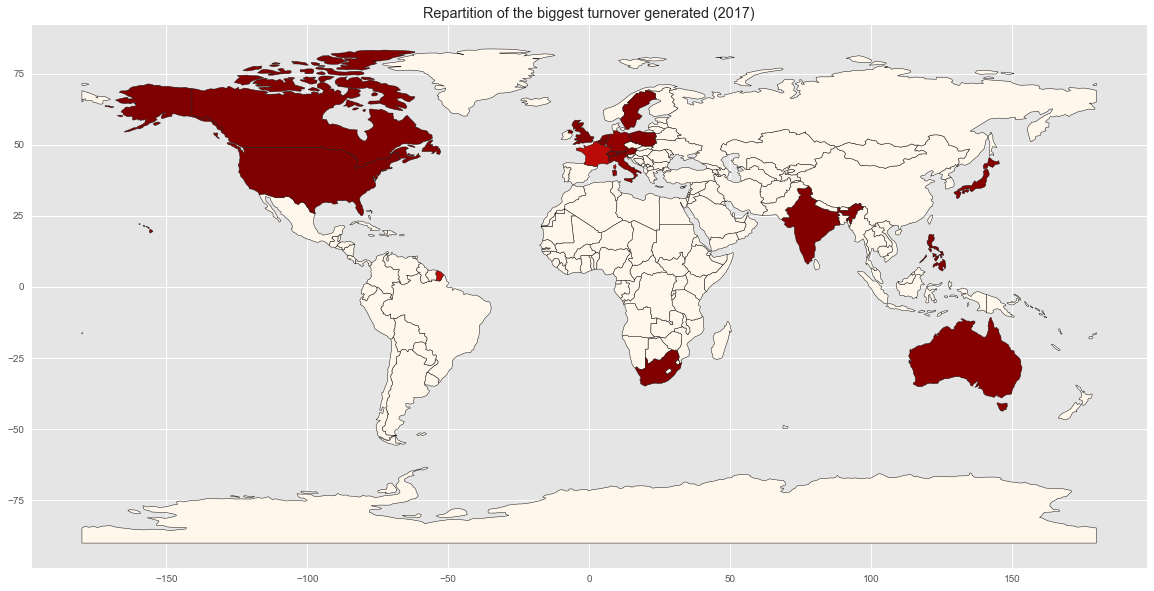

In [1422]:
fig, ax = plt.subplots(figsize = (20,10))

combo.plot(ax = ax, edgecolor='k', column='Turnover',  cmap='OrRd')

plt.title('Repartition of the biggest turnover generated (2017)')

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


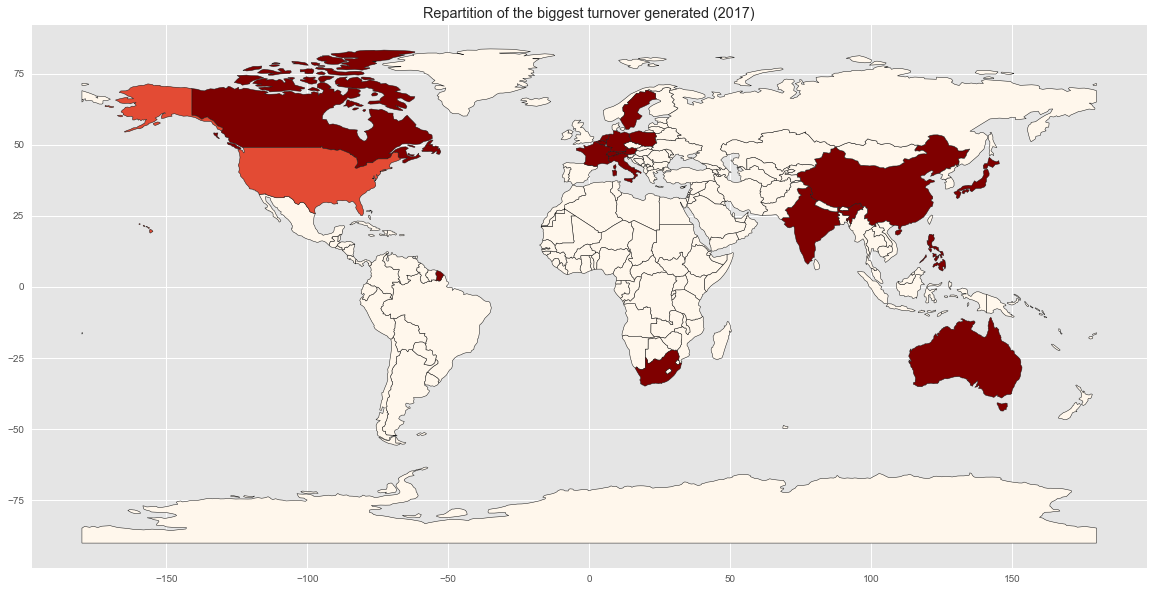

In [1423]:
fig, ax = plt.subplots(figsize = (20,10))

combo.plot(ax = ax, edgecolor='k', column='Lots sold',  cmap='OrRd')

plt.title('Repartition of the biggest turnover generated (2017)')


plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


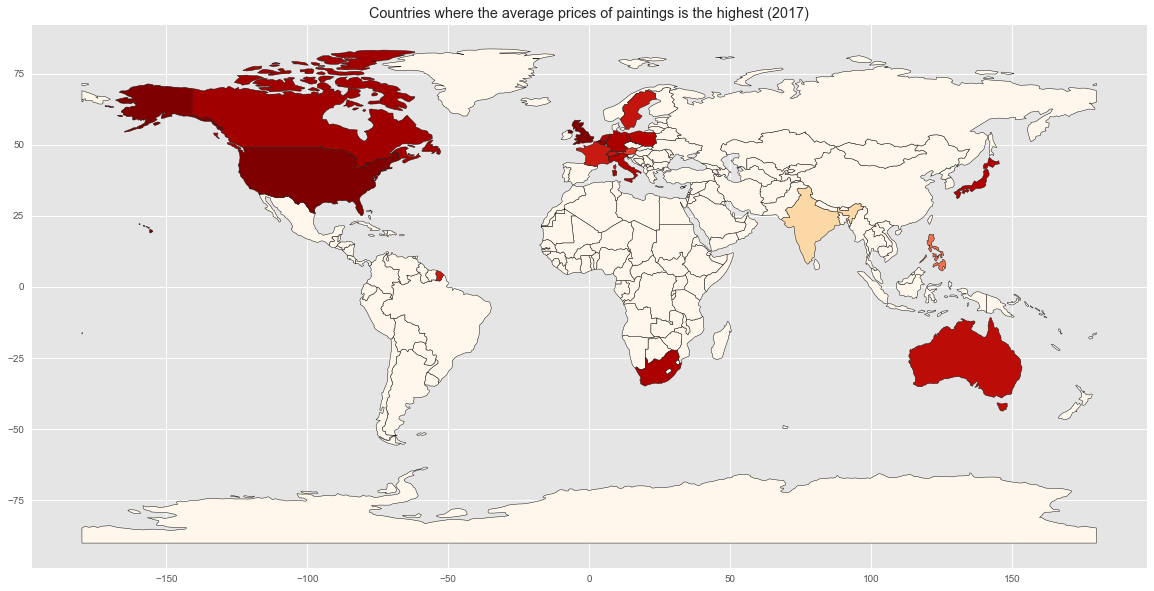

In [1424]:
fig, ax = plt.subplots(figsize = (20,10))

combo.plot(ax = ax, edgecolor='k', column='Average',  cmap='OrRd')

plt.title('Countries where the average prices of paintings is the highest (2017)')


plt.show()

### Interpretation : Why do we need three maps ?

We can see that the map plotting evolutes along the different parameters. For instance, in the UK, there are very expensive (one of the highest turnover and one the highest average price) lots sold, but there are fewer lots sold than in the other leader countries. Another example : India generates a great turnover by selling many lots, but those lots are less expensive than the global average.

## 3.1 Global evolution of the art market

In [1425]:
Sum = [auctions_past.Price.sum() , auctions_postcrisis.Price.sum(), auctions_today.Price.sum()]
Mean = [auctions_past.Price.mean() , auctions_postcrisis.Price.mean(), auctions_today.Price.mean()]

In [1426]:
index = pd.DataFrame({'Sum' : Sum}, columns=['Sum'])
index.rename(index={0:'2002-03',1:'2008-09',2:'2016-17'}, 
                 inplace=True)

(800000000, 6000000000)

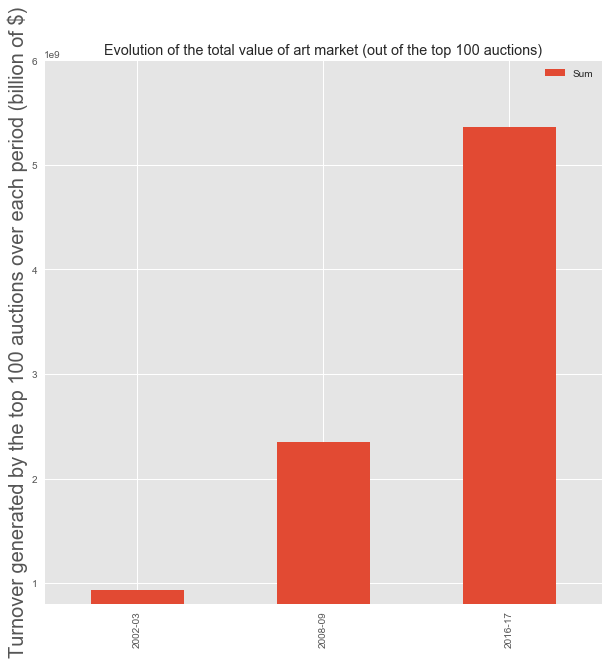

In [1427]:
fig, ax = plt.subplots(figsize=(10,10))

index.plot(ax=ax, kind = 'bar', title = 'Evolution of the total value of art market (out of the top 100 auctions)')
ax.set_ylabel('Turnover generated by the top 100 auctions over each period (billion of $)', size = 20) 
ax.set_ylim(800000000,6000000000)

In [1428]:
index = pd.DataFrame({'Mean' : Mean})
index.rename(index={0:'2002-03',1:'2008-09',2:'2016-17'},
                 inplace=True)

(5000000, 30000000)

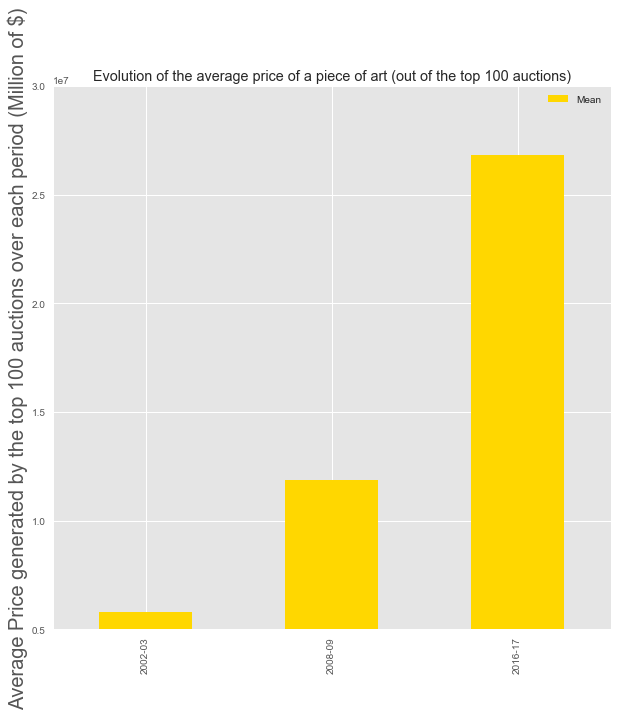

In [1429]:
fig, ax = plt.subplots(figsize=(10,10))

index.plot(ax=ax, kind = 'bar', title = 'Evolution of the average price of a piece of art (out of the top 100 auctions)', color = ['gold'])
ax.set_ylabel('Average Price generated by the top 100 auctions over each period (Million of $)', size = 20) 
ax.set_ylim(5000000,30000000)

# 3.3 First conclusions

There are two main conclusions. 

The first one is crucial : the global value of the top 100 auctions is growing. This illustrates a main trend of the global art market : the global value of art market is growing. Even when economic crisis occur, the global art market keep on increasing. 

But what does "increasing" mean in this context ? Well, the global art market increase for two reasons : 
- because the average price at which the paintings are sold has been increasing ; 
- because the global Turnover generated by paintings auction increases.

The second conclusion is both historical and geographical.
As a reflect of globalization, art market is nowadays a "global" market. In the 60's, Paris was the main "Art auction city", then came London and New York. But since the end of the XX° century, places like Hong Kong (mainly), or Taipei, Bombay or Beijing are taking over and trying to expand there slices of the pie.


# 4. Which artists is the most profitable ? 

# 4.0 Top artistis sold

In [1430]:
artists_2017["Average Price"] = artists_2017.Turnover/artists_2017.Sold_lots

In [1431]:
artists_2016["Average Price"] = artists_2016.Turnover/artists_2016.Sold_lots

In [1432]:
artists_contemporary["Average Price"] = artists_contemporary.Turnover/artists_contemporary.Sold_lots

In [1433]:
artists_2016.nlargest(10,'Average Price').set_index('Artist').drop("Sold_lots", axis=1)

,Turnover,Average Price
Artist,,
REN Renfa,44149512,4.414951e+07
ZENG Gong,31691700,3.169170e+07
GENTILESCHI Orazio,31270297,1.563515e+07
ROTHKO Mark,40346500,1.344883e+07
STILL Clyfford,51230000,1.280750e+07
WU Zhen,36929002,1.230967e+07
ZHANG Jizhi,9183900,9.183900e+06
SONG Ke,14085880,7.042940e+06
SUN Junze,6862211,6.862211e+06


In [1434]:
artists_2017.nlargest(10,'Average Price').set_index('Artist').drop("Sold_lots", axis=1)

,Turnover,Average Price
Artist,,
Leonardo da VINCI,450312500,450312500.0
Andy WARHOL,269965641,269965641.0
Pablo PICASSO,446404736,223202368.0
Marc CHAGALL,132159541,132159541.0
Joan MIRO,87984070,87984070.0
CHEN Rong,48967500,48967500.0
ZHAO Lingrang,27127500,27127500.0
Salvador DALI,19105643,19105643.0
LI Gonglin,17607500,17607500.0


In [1435]:
artists_contemporary.nlargest(10,'Average Price').set_index('Artist').drop("Sold_lots", axis=1)

,Turnover,Average Price
Artist,,
Jean-Michel BASQUIAT,313520830.0,3.199192e+06
GENG Jianyi,2699280.0,2.699280e+06
Mark GROTJAHN,39046320.0,2.296842e+06
Rudolf STINGEL,51539840.0,1.840709e+06
Mark BRADFORD,16374654.0,1.637465e+06
Peter DOIG,60651662.0,1.516292e+06
John CURRIN,13526334.0,1.502926e+06
XING Dong,2750983.0,1.375492e+06
ZENG Fanzhi,31099780.0,1.352164e+06


# 4.1 Vizualisation : what is the main strucutre of the paintings sold by the "best" artists ? (best in the sens of most sold)

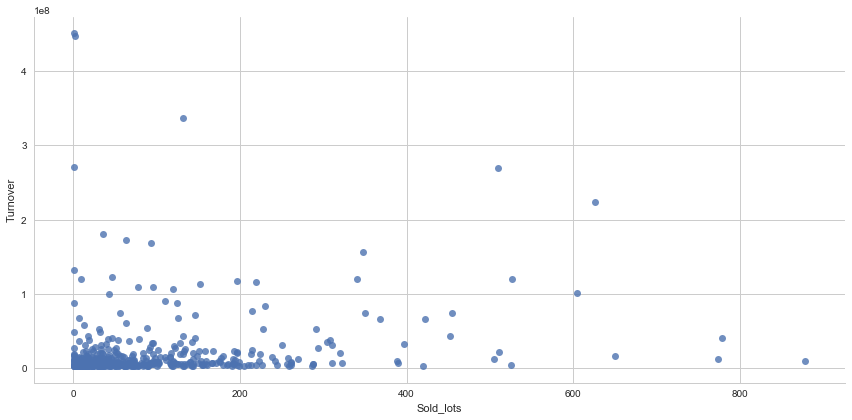

In [1436]:
sns.set(style="whitegrid", 
        color_codes=True)

# Plot graph
sns.lmplot('Sold_lots','Turnover',
           data=artists_2017,
           fit_reg=False,
           scatter=True,
           palette="Red",
           size = 6,
           aspect = 2)

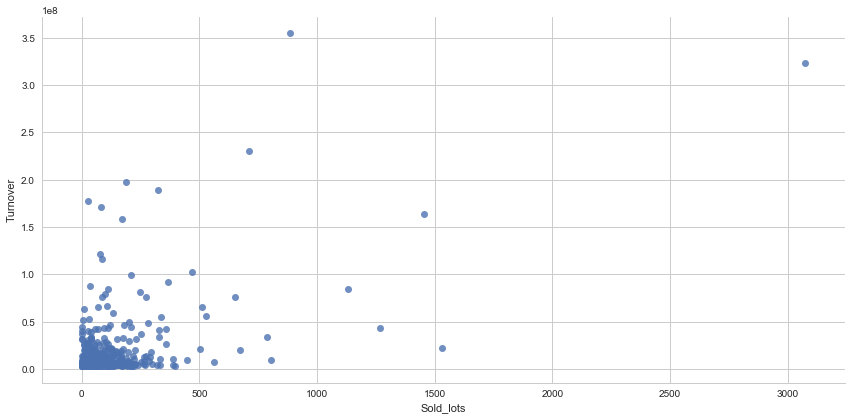

In [1437]:
sns.set(style="whitegrid", 
        color_codes=True)

# Plot graph
sns.lmplot('Sold_lots','Turnover',
           data=artists_2016,
           fit_reg=False,
           scatter=True,
           palette="Red",
           size = 6,
           aspect = 2)

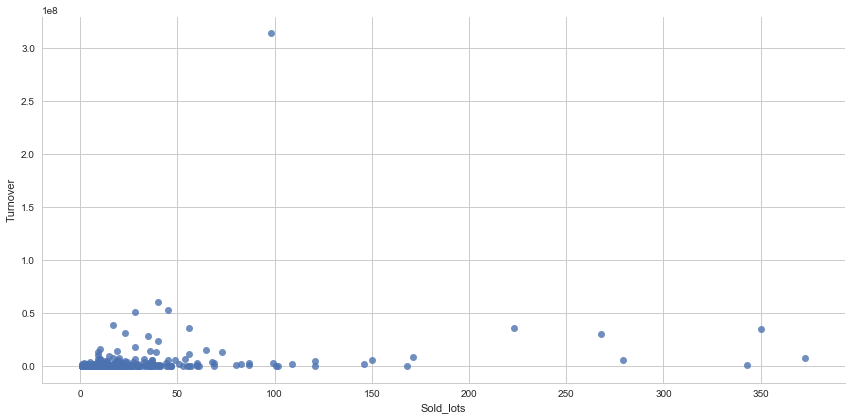

In [1438]:
sns.set(style="whitegrid", 
        color_codes=True)

# Plot graph
sns.lmplot('Sold_lots','Turnover',
           data=artists_contemporary,
           fit_reg=False,
           scatter=True,
           palette="Red",
           size = 6,
           aspect = 2)

### Conclusion : 

It is pretty clear. Most of the artists (90%) sold less than 50 paintings, and all this sells generate a turnover less than 5 million dollars. 

The main difference relies on the fact that the general top artists generate a greater turnover than the top contemporary artists. 

The time when the whole art market is focused only on the contemporary art hasn't arrived yet. 

### Does it that we should focus on another period of History of art ? 

# 4.2 Should we invest in Old masters paintings ?

Contemporary artists are doing pretty well, but still less than the global average represented by the top 500 artists of 2016 and 2017. Moreover, Salvatore Mundi, as a main representative of what an Old Masters paintings is, is the most expensive piece of art in the History. 

That is why it seems legitimate to study the results of the Old Masters paintings, as regards the auctions. To do that, we will us the top 20 Old Masters paintings sold in 2017 and compare the results of these auctions to the generale top 20 of 2017 (the second top 20 includes Salvatore Mundi which is an Old Master painting).

In [1439]:
old_master = pd.read_excel('/Users/ismaelbaroudi/Desktop/Old_masters.xlsx')

In [1440]:
old_master.drop(['Artwork'], axis=1, inplace = True)
old_master.drop(['Date'], axis=1, inplace = True)
old_master.drop(['Auction house'], axis=1, inplace = True)

In [1441]:
old_master.shape

(20, 2)

In [1442]:
top20_2017 = auctions_2017.head(20)
top20_2017.drop(['Date'], axis=1, inplace = True)
top20_2017.drop(['Auction_house'], axis=1, inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1443]:
Mean = [old_master.Price.mean(),top20_2017.Price.mean() ]

In [1444]:
Sum = [old_master.Price.sum(), top20_2017.Price.sum()]

In [1445]:
index = pd.DataFrame({'Mean' : Mean, 'Sum' : Sum}, columns=['Mean','Sum'])
index.rename(index={0:'2002-03',1:'2016-17'},
                 inplace=True)

Text(0,0.5,'$')

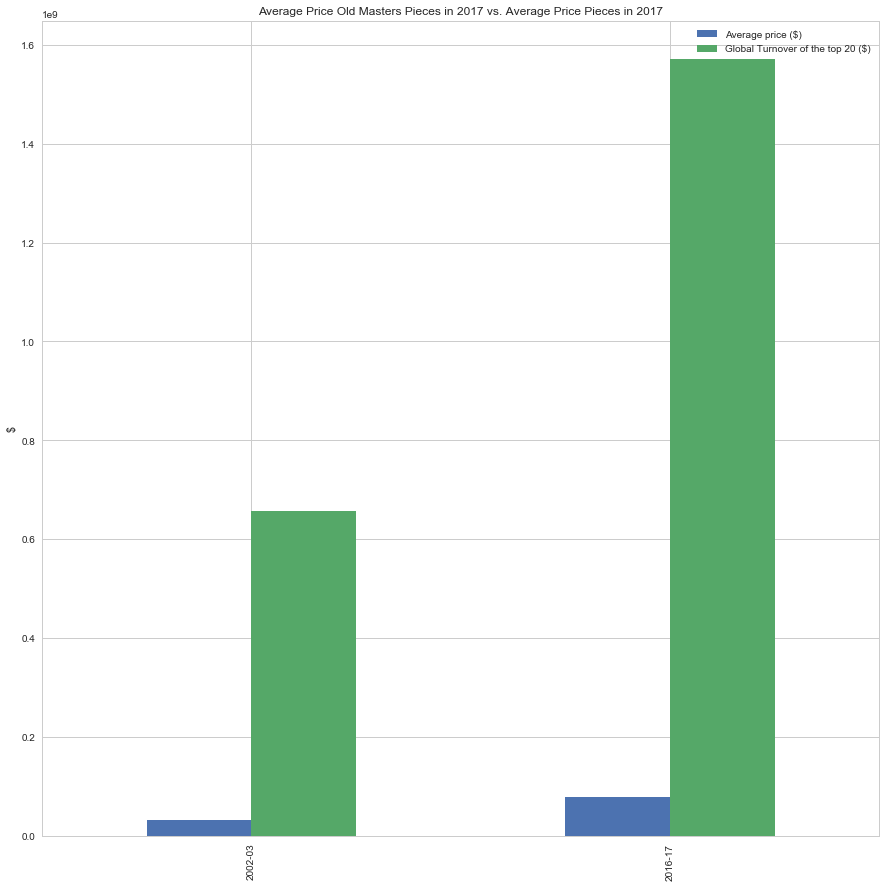

In [1446]:
fig, ax = plt.subplots(figsize=(15,15))

index.plot(ax=ax, kind = 'bar', title = 'Average Price Old Masters Pieces in 2017 vs. Average Price Pieces in 2017')
ax.legend(['Average price ($)', 'Global Turnover of the top 20 ($)'], loc = 'best')
ax.set_ylabel('$') 

# Conclusion : 

Definitely no. The results of the Old Masters paintings are lower than the results of the global paintings. Salvatore Mundi and more precisely Leonard Da Vinci seems to be an expection.

# 4.3 Is there any correlation between the number of lots sold by from an artist and the total Turnover of this same artist?

After these first studies of the structure of the art market, I've tried to read between the lines of the global art market trend : is it possible to find any correlations ?  My first intuition was to study the result of the top 500 artists (in 2017, in 2016, and only the contemporary artists in 2017). 

### Is there any link between the number of pieces of art sold by an artist, and the general turnover generated by this same artistis ?

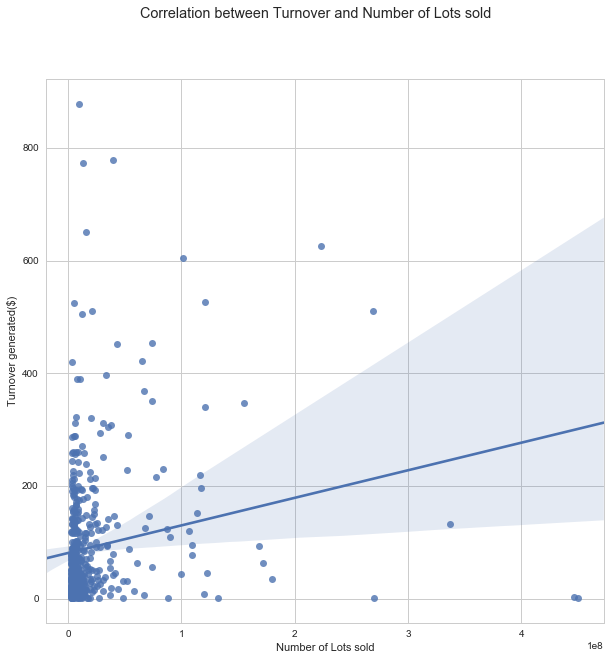

In [1447]:
fig, ax = plt.subplots(figsize=(10,10))

sns.set(style='whitegrid')

sns.regplot('Turnover', 'Sold_lots', data=artists_2017)


fig.suptitle('Correlation between Turnover and Number of Lots sold')
ax.set_xlabel('Number of Lots sold')
ax.set_ylabel('Turnover generated($)')


    
plt.show()

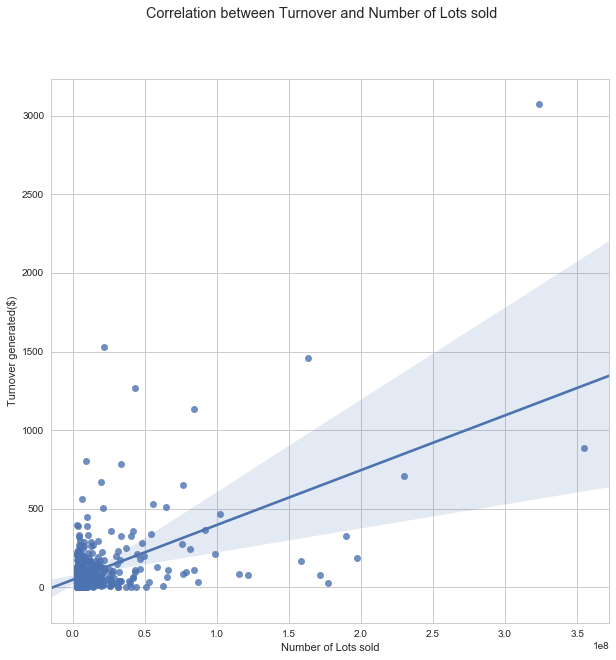

In [1448]:
fig, ax = plt.subplots(figsize=(10,10))

sns.set(style='whitegrid')

sns.regplot('Turnover', 'Sold_lots', data=artists_2016)


fig.suptitle('Correlation between Turnover and Number of Lots sold')
ax.set_xlabel('Number of Lots sold')
ax.set_ylabel('Turnover generated($)')


    
plt.show()

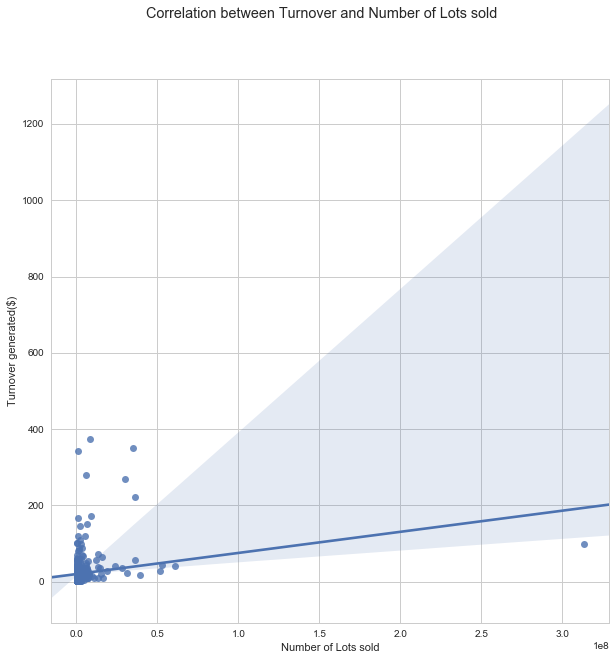

In [1449]:
fig, ax = plt.subplots(figsize=(10,10))

sns.set(style='whitegrid')

sns.regplot('Turnover', 'Sold_lots', data=artists_contemporary)


fig.suptitle('Correlation between Turnover and Number of Lots sold')
ax.set_xlabel('Number of Lots sold')
ax.set_ylabel('Turnover generated($)')

    
plt.show()

## General Conclusions of the 4th Part :  An interesting illustration of the Supply and Demand Principle

There is no significative correlation. It seems that in general, we cannot find any correlation between the number of paintings sold and the turnover generated. There are artists that sell very few paintings but for a great amount, and others that sell

However there is here a very interesting remark. If we considere the case of Leonardo Da Vinci : in 2017 only one major paintings of him was sold. The reason is because actually, this paiting is one of the last painting of Da Vinci which is still in the private market. Indeed, most of Da Vinci works belongs to museums and aren't priced nor for sell. In the case of contemporary artists, on average, there are lots of paintings sold, but for lower prices. There are multiple

This is an interesting illustration of the well-known principle of Supply and Demand, in the field of Art Market.

But who are the main actor of these transactions ? 

# 5. Auction Houses

# 5.0 Readjust the dataset 

Exactly similar at part 1.0 Cleaning.

In [1450]:
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("New York NY","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("New York","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("London","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("Beijing","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("Wanchai","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("Paris","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("Hong Kong","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace(" ","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace(".","")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("PolyInternationalAuctionCo,Ltd","PolyAuction")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("PolyInternational","PolyAuction")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("PolyInternationalAuction","PolyAuction")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("PolyAuctionAuction","PolyAuction")
auctions_today.Auction_house = auctions_today.Auction_house.str.replace("ChinaGuardianAuctionsCo,Ltd","ChinaGuardian")

In [1451]:
auctions_postcrisis.Auction_house =auctions_postcrisis.Auction_house.str.replace("LONDON","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("NEW YORK NY","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("NEW YORK","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("BEIJING","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("HONG KONG","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("HANGZHOU","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("TAIPEI","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace("PARIS","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace(".","")
auctions_postcrisis.Auction_house = auctions_postcrisis.Auction_house.str.replace(" ","")

In [1452]:
auctions_past.Auction_house =auctions_past.Auction_house.str.replace("London","")
auctions_past.Auction_house = auctions_past.Auction_house.str.replace("New-York","")
auctions_past.Auction_house = auctions_past.Auction_house.str.replace("Paris","")
auctions_past.Auction_house = auctions_past.Auction_house.str.replace(" ","")
auctions_past.Auction_house = auctions_past.Auction_house.str.replace("/","")
auctions_past.Auction_house = auctions_past.Auction_house.str.replace("PhillipsDePury&","Phillips")
auctions_past.Auction_house = auctions_past.Auction_house.str.replace("Ritchies&Sotheby’","Sotheby’s")

# 5.1 Auction houses : who's the best ? (2002-03 // 2008-09 // 2016-17)

In [1453]:
top5_auction_house_2002_03 = auctions_past.Auction_house.value_counts()
top5_auction_house_2008_09 = auctions_postcrisis.Auction_house.value_counts()
top5_auction_house_2016_17 = auctions_today.Auction_house.value_counts()

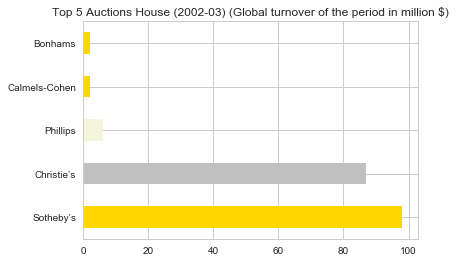

In [1454]:
top5_auction_house_2002_03.head(5).plot(kind='barh',
                            title='Top 5 Auctions House (2002-03) (Global turnover of the period in million $)',   
                            color=['gold', 'silver', 'beige'])

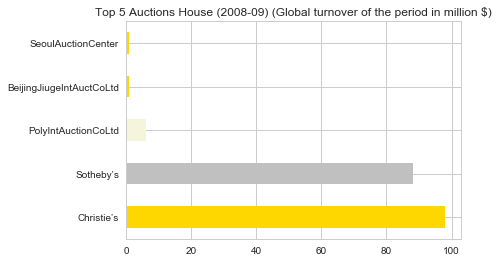

In [1455]:
top5_auction_house_2008_09.head(5).plot(kind='barh',
                            title='Top 5 Auctions House (2008-09) (Global turnover of the period in million $)',   
                            color=['gold', 'silver', 'beige'])

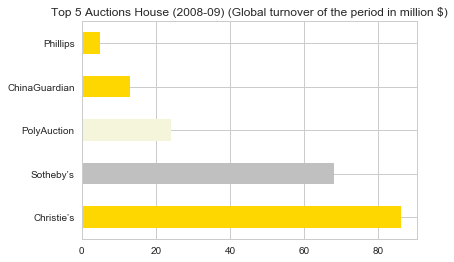

In [1456]:
top5_auction_house_2016_17.head(5).plot(kind='barh',
                            title='Top 5 Auctions House (2008-09) (Global turnover of the period in million $)',   
                            color=['gold', 'silver', 'beige'])

### First result 

Sotheby's and Christie's are the two main auction houses. Over the last 15 years, Christie's has over passed Sotheby's in terms of global Turnover. 

We can moreover notice the emergence of Chinese actors, which accounts for the increasing weight of China in art market. But even if there are other actors, it seems to be almost a Duopoly : Sotheby's and Christie's are the two main auction houses.

# 5.2 Comparaison : a closer comparaison between 2002-03 and 2016-17

In [1457]:
top5_auction_house_2002_03.ix['Calmels-Cohen']=0
top5_auction_house_2002_03.ix['Bonhmas']=0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


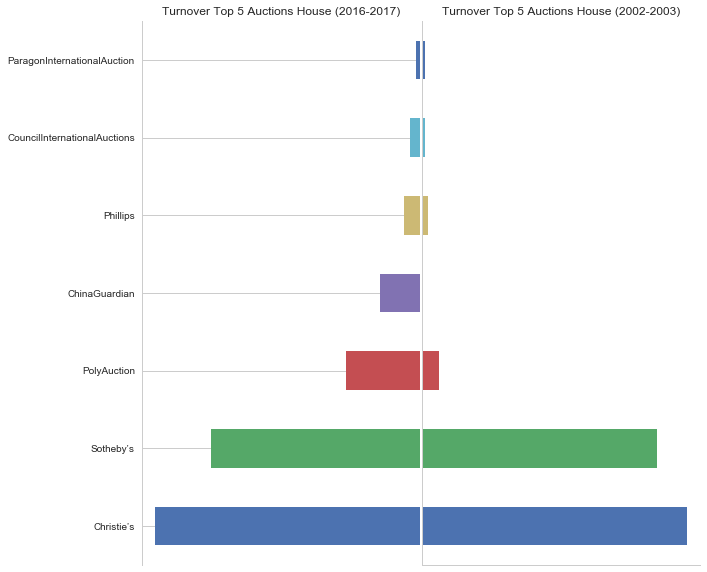

In [1458]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
locx = list(range(0,80))
barwidth = 10

top5_auction_house_2016_17.head(7).plot(ax = ax[0], kind='barh',
                            title='Top 5 Auctions House (2008-09)')

top5_auction_house_2002_03.head(7).plot(ax = ax[1], kind='barh',
                            title='Top 5 Auctions House (2002-03)')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].invert_xaxis()
ax[0].set_title("Turnover Top 5 Auctions House (2016-2017)")
ax[1].set_title("Turnover Top 5 Auctions House (2002-2003)")
box1 = ax[0].get_position()
box2 = ax[1].get_position()

fig.subplots_adjust(wspace=0.01, hspace=0)

plt.show()

## Observations : 

Clearly, Christie's and Sotheby's are heading over. And we can notice the fast and growing weigth of international actor (specially China Guardian).

That is why, now we will focus more on the dual between Sotheby's and Christie's.

# 5.3  Sotheby's VS Christie's : Clash of the Titans

In terms of Turnover, generated in 2002-2003 : Sotheby's is leading. 
In terms of Turnover, generated in 2016-2017 : Christie's is leading (this is also a general trend over the last 15 years).

However, it's not enough to compare those two auction houses. We can also compare the strucutre of their auction in order to understand more how they work and how to compare them.

# The dual to be involved in the top 100 auctions in 2002 and 2003

In [1459]:
auctions_house_2002 = auctions_past.groupby("Auction_house")

In [1460]:
Sot = auctions_house_2002.get_group('Sotheby’s')
Chris = auctions_house_2002.get_group('Christie’s')
Phil = auctions_house_2002.get_group('Phillips')

In [1461]:
top = pd.merge(Sot,Chris,
              how="outer")


Text(0.5,1,"Sell Structure of the Sotheby's and Christie's (2002-2003)")

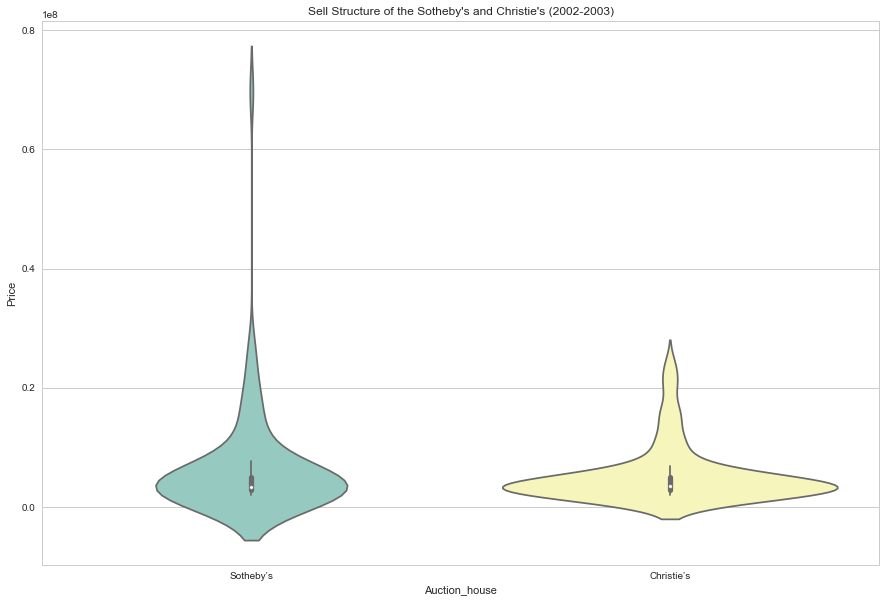

In [1462]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="Auction_house", y="Price", data=top, palette="Set3")
ax.set_title("Sell Structure of the Sotheby's and Christie's (2002-2003)")

# The dual to be involved in the top 100 auctions in 2016 and 2017

In [1463]:
auctions_house_2016 = auctions_today.groupby("Auction_house")

Text(0.5,1,"Sell Structure of the Sotheby's and Christie's (2016-2017)")

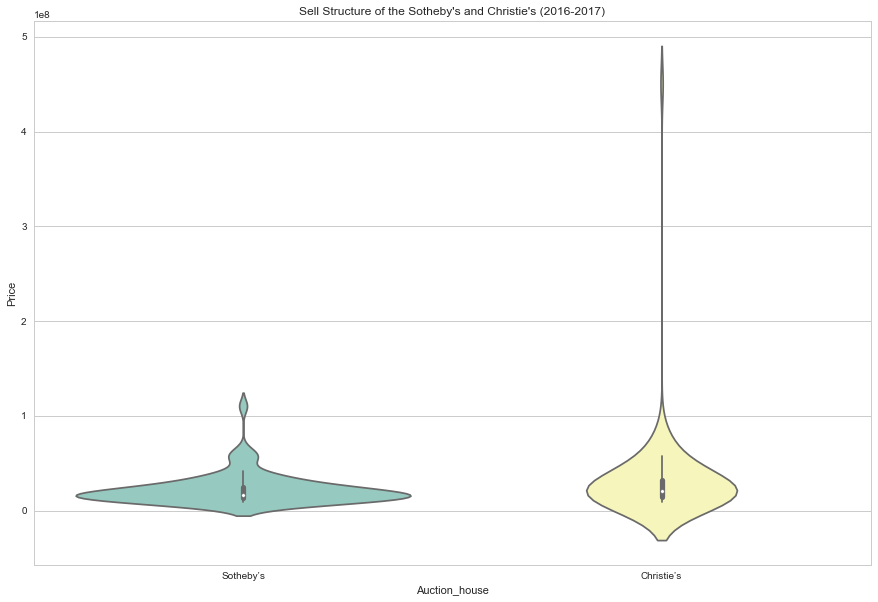

In [1464]:
Sot = auctions_house_2016.get_group('Sotheby’s')
Chris = auctions_house_2016.get_group('Christie’s')
Phil = auctions_house_2016.get_group('Phillips')

top = pd.merge(Sot,Chris,
              how="outer")

f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="Auction_house", y="Price", data=top, palette="Set3")
ax.set_title("Sell Structure of the Sotheby's and Christie's (2016-2017)")

# Conclusions : 

We can a significant difference among the sell strucutre. 
For the most recent auctions, Sotheby's sell are more compressend than the Christie's ones. On average Sotheby' seem to sell much more "average" prices pieces. Contrary to Christie's sell : there is a significant gap among the sell of Christie's in terms of price. Christie's is accounting for the cheapest auctions of this ranking but also the expensivest (such the well-known Salvatore Mundi). 

This was exacltly the opposite about 15 years ago. 

Does it mean that to be the leader of auction houses (in terms of Turnover) your sells must have a greater volatily ? This is what those plots tend to show.

# 6. Is there a better time to buy of art ? 

When it comes to market trends, it is also crucial to study the evolution of the same index over a period.

# 6.1 Readjusting the dataset

In [1465]:
auctions_today.Date = auctions_today.Date.str.replace('.','')
auctions_today.Date = auctions_today.Date.str.replace(' ','-')
auctions_today.Date = auctions_today.Date.str.replace('Jan','01')
auctions_today.Date = auctions_today.Date.str.replace('Feb','02')
auctions_today.Date = auctions_today.Date.str.replace('Mar','03')
auctions_today.Date = auctions_today.Date.str.replace('Apr','04')
auctions_today.Date = auctions_today.Date.str.replace('May','05')
auctions_today.Date = auctions_today.Date.str.replace('Jun','06')
auctions_today.Date = auctions_today.Date.str.replace('July','07')
auctions_today.Date = auctions_today.Date.str.replace('Jul','07')
auctions_today.Date = auctions_today.Date.str.replace('Aug','08')
auctions_today.Date = auctions_today.Date.str.replace('Sep','09')
auctions_today.Date = auctions_today.Date.str.replace('Oct','10')
auctions_today.Date = auctions_today.Date.str.replace('Nov','11')
auctions_today.Date = auctions_today.Date.str.replace('Dec','12')
auctions_today.Date = auctions_today.Date.str.replace('--','-')
auctions_today.Date = auctions_today.Date.str.replace('2016-','2016')

In [1466]:
auctions_today.Date = pd.to_datetime(auctions_today["Date"])

In [1467]:
auctions_today.set_index('Date', inplace=True)

# 6.1 Vizualisation : the use of Time series to identify the moments of the year when most of the sells happens 

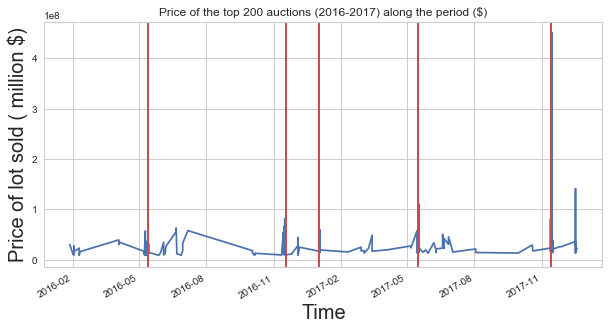

In [1468]:
fig, ax  = plt.subplots(figsize = (10,5))

auctions_today["Price"].plot(ax = ax)

ax.set_title('Price of the top 200 auctions (2016-2017) along the period ($)')
ax.set_ylabel('Price of lot sold ( million $)', size=20)
ax.set_xlabel('Time', size=20)


ax.axvline(x= pd.to_datetime('05-14-2016'),           
           color='r', 
           linestyle='-',  
           linewidth=2)

ax.axvline(x= pd.to_datetime('11-18-2016'),           
           color='r', 
           linestyle='-',  
           linewidth=2)

ax.axvline(x= pd.to_datetime('01-2017'),           
           color='r', 
           linestyle='-',  
           linewidth=2)

ax.axvline(x= pd.to_datetime('05-17-2017'),           
           color='r', 
           linestyle='-',  
           linewidth=2)

ax.axvline(x= pd.to_datetime('11-14-2017'),           
           color='r', 
           linestyle='-',  
           linewidth=2)


plt.show()

We can notice that when there are 4 main periods when there much more movements than the other periods of the year. 
At every transition of the year (Novembre-January) and also around end April-begining June. 

This iw when most of top 200 auctions (over 2016-2017) happened.

# 7. Conclusions and area for improvement

### Areas for improvement

Well, first and foremost I've based my study on the hypothesis that the top 100 (for auctions) or top 500 (for artists), is representative enough of the whole trend of the market. 

Then, my work is based on one main data source, ArtPrice, it could have been useful to find other sources in order to compare the main results I've gathered.



### Conclusion

To conclude, art market is more than ever in expansion. It is nowadays led by two main auction houses which are facing the concurence of several international competitors.

"The art market is global now, and there's becoming more of an international consensus about what constitutes good art." These are the words of Larry Gagosian, founder of the biggest art gallery. These word are probably the best to finish with as regards all the indexes and conclusion we've drawn so far.